# Task A1

Imagine you are given a task by your game company to create an intelligent NPC. You would like to train an artificial neural network (ANN) that acts as the brain of your NPC. 
Your ANN must learn to handle your NPC's decision-making process in your game - that is, whether the NPC will attack or flee, depending on the NPC’s power and the enemy’s power, as described in the following table.

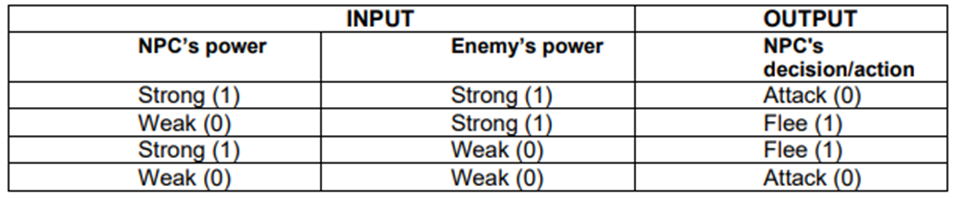

## Task A1.1
Develop a computer program to implement an ANN, with the Sigmoid function as the activation function, to make the decision according to the table. Your ANN should consist of 2 input neurons, 1 hidden layer with 2 neurons and 1 output neuron. Then train your ANN using the backpropagation technique to learn the NPC's decision/action table.

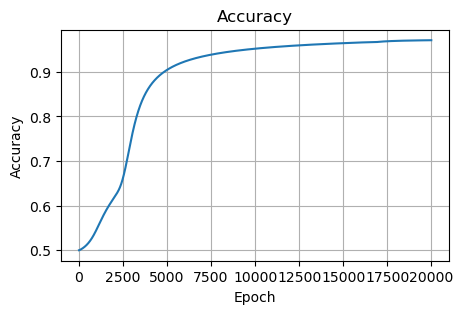

Weights
ID: 0 Ptr: [0,2] Value: 4.1794657160327615
ID: 1 Ptr: [1,2] Value: 4.1473424894486834
ID: 2 Ptr: [0,3] Value: 6.237439165258727
ID: 3 Ptr: [1,3] Value: 6.181745165856229
ID: 4 Ptr: [2,4] Value: -9.378985668829133
ID: 5 Ptr: [3,4] Value: 8.296553044993438

Cases
Case 0: X: [1.0, 1.0] Y: 0.0 Actual Output: 0.01575 Accuracy: 98.43%
Case 1: X: [0.0, 1.0] Y: 1.0 Actual Output: 0.9684 Accuracy: 96.84%
Case 2: X: [1.0, 0.0] Y: 1.0 Actual Output: 0.9679 Accuracy: 96.79%
Case 3: X: [0.0, 0.0] Y: 0.0 Actual Output: 0.03608 Accuracy: 96.39%

Epoch Sum Error 0.000248
Accuracy: 97.11%
ID:  2 Square Error: 0.9062
ID:  3 Square Error: 0.9999
ID:  4 Square Error: 0.01575



In [12]:
# Libraries
import numpy as np
import random as rand
import matplotlib.pyplot as plt

class Neuron:

  def __init__(self, ID):

    self.NeuronID = ID  

    self.Bias = 0.0
    self.Input = 0.0
    self.Output = 0.0
    self.SquareError = 0.0

class Weight:

  def __init__(self, WeightID, PtrStart, PtrEnd, WeightVal = 0.0, InputVal = 0.0):
    
    self.WeightID = WeightID
    self.WeightValue = WeightVal
    self.InputValue = InputVal

    self.PtrStart = PtrStart
    self.PtrEnd = PtrEnd

class Layer:

  def __init__(self, ID):

    self.LayerID = ID
    self.NeuronIDs = []
    self.WeightIDs = []

  def GetNeuronCount(self):
    
    return len(self.NeuronIDs)

  def GetWeightCount(self):
    
    return len(self.WeightIDs)

# Case Class
class Case:

  def __init__(self, ID, X, Y):

    self.CaseID = ID

    self.X = X
    self.Y = Y

    self.ActualOutput = 0.0
    self.Error = 0.0

# Activation Class
class Act:

  def Step(X, Derivative = False, Threshold = 0.0): 
    
    if Derivative: return 0.0
    elif X >= Threshold: return 1.0
    else: return 0.0

  def Sigmoid(X, Derivative = False): 
        
    if Derivative: return  X * (1.0 - X)
    else: return 1.0 / (1.0 + np.exp(-X))

  def Sign(X, Derivative = False): 
    
    if Derivative: return 0.0
    elif X == 0.0: return 0.0
    elif X > 0.0: return 1.0
    else: return -1.0

# Model Class
class Model:
 
    # Init Model vairables
    def __init__(self):

        # Training Data
        self.Case = []
        self.InputCount = 0
        self.OutputCount = 0

        self.CountNeuronID = -1
        self.CountWeightID = -1
        self.CountLayerID = -1

        # Neural Network Attributes
        self.EpochMax = 0
        self.LearnRate = 0.0
        self.Activate = None
        
        # Neural Network Objects
        self.Layer = [] # index 0 = input layer, index -1 = output layer
        self.Neuron = []
        self.Weight = []

        self.EpochSumError = []
        self.Accuracy = []

    # ID System #
    def CreateLayerID(self):
        
        self.CountLayerID += 1
        return self.CountLayerID
    def CreateNeuronID(self):
    
        self.CountNeuronID += 1
        return self.CountNeuronID
    def CreateWeightID(self):
        
        self.CountWeightID += 1
        return self.CountWeightID
    # End ID System #
    
    def GetWeightValue(self, PtrStart, PtrEnd):
        
        for w in self.Weight:
            if w.PtrStart == PtrStart and w.PtrEnd == PtrEnd: return w.WeightValue

        return 0.0
    
  # Training Data
    def InitDataSet(self, X, Y):
        
        # We count the number of nested lists, not the number of elements
        self.InputCount = sum(isinstance(i, list) for i in X)
        self.OutputCount = sum(isinstance(i, list) for i in Y)

        # Generate Cases from training data
        if self.InputCount == 2 and self.OutputCount == 1:

            for c in range(0, len(X[0]),1):
                self.Case.append(Case(c, [ X[0][c], X[1][c] ], Y[0][c]))

        else: assert False, "Invalid Training Data - Dataset not supported"

  # Neural Network
    def InitNeuralNet(self):
        
        # Create Layers
        for l in range(0,3,1):
        
            self.Layer.append(Layer(self.CreateLayerID()))

            # Create Input, hidden and output neurons
            for n in range(0, self.InputCount if l != 2 else self.OutputCount, 1):
                self.Neuron.append(Neuron(self.CreateNeuronID()))
                self.Layer[-1].NeuronIDs.append(self.Neuron[-1].NeuronID)

        # Generate Weights 
        for l in self.Layer[1::]:
            
            # Set random weights and biases for layer
            initWeight = rand.uniform(0.0,1.0)
            initBias = rand.uniform(-.5,.5)

            for n in l.NeuronIDs:
                
                self.Neuron[n].Bias = initBias

                for nPrior in self.Layer[l.LayerID - 1].NeuronIDs: # Connect to each neuron in the previous layer
                    
                    self.Weight.append(Weight(self.CreateWeightID(), nPrior, n, initWeight))
                    self.Layer[l.LayerID].WeightIDs.append(self.Weight[-1].WeightID)

        self.Weight[0].WeightValue = 0.5
        self.Weight[1].WeightValue = 0.4
        self.Weight[2].WeightValue = 0.9
        self.Weight[3].WeightValue = 1.0
        self.Weight[4].WeightValue = -1.2
        self.Weight[5].WeightValue = 1.1

        self.Neuron[2].Bias = 0.8
        self.Neuron[3].Bias = -0.1
        self.Neuron[4].Bias = 0.3

  # Train Model
    def TrainModel(self, Activate, LearnRate = 0.1, EpochMax = 1000):
    
        # Save neural network attributes
        self.Activate = Activate
        self.LearnRate = LearnRate
        self.EpochMax = EpochMax

        for e in range(0, EpochMax):
            
            # Train on each case
            for c in self.Case:
                
                # Feed Data to Input Layer
                for n in self.Layer[0].NeuronIDs:

                    # Set Input Neuron Output to Case Input
                    self.Neuron[n].Input = c.X[n]
                    self.Neuron[n].Output = self.Neuron[n].Input

                    # Set Weight Input Values. This propogates the output through the network
                    for w in self.Layer[1].WeightIDs:

                        if self.Weight[w].PtrStart == self.Neuron[n].NeuronID:
                            self.Weight[w].InputValue = self.Neuron[n].Output

                # Forward Propogation
                for l in self.Layer[1::]: # Skip Input Layer

                    for n in l.NeuronIDs:

                        # Calculate Input - Start From Bias and add weighted inputs
                        self.Neuron[n].Input = self.Neuron[n].Bias
                        
                        for w in l.WeightIDs:
                            
                            if self.Weight[w].PtrEnd == self.Neuron[n].NeuronID: 
                                self.Neuron[n].Input += self.Weight[w].InputValue * self.Weight[w].WeightValue
            
                        # Calculate Output
                        self.Neuron[n].Output = Activate(self.Neuron[n].Input)

                        # Update Weight Input from neuron output - This propogates to the next layer
                        if l.LayerID != self.Layer[-1].LayerID:
                            
                            for w in self.Layer[l.LayerID + 1].WeightIDs:
                                
                                if self.Weight[w].PtrStart == self.Neuron[n].NeuronID: 
                                    self.Weight[w].InputValue = self.Neuron[n].Output

                # Error Calculation. Index -1 is the output neuron
                error = c.Y - self.Neuron[-1].Output
                delta = Activate(self.Neuron[-1].Output, Derivative = True) * error

                # Update Case
                c.ActualOutput = self.Neuron[-1].Output
                c.Error = abs(error)

                # Back Propogation
                for n in reversed(self.Neuron[self.InputCount::]): # Skip Input layer, Start from Output reversed
                
                    # We check if the neuron is the output neuron. If it is, we use the delta calculated above
                    outputDeriv = Activate(n.Output, Derivative = True) * self.GetWeightValue(n.NeuronID, self.Neuron[-1].NeuronID)
                    localDelta = outputDeriv * delta if (n.NeuronID != self.Neuron[-1].NeuronID) else delta
                    
                    # Update Weights
                    for w in reversed(self.Weight):

                        if w.PtrEnd == n.NeuronID: 
                         w.WeightValue += LearnRate * w.InputValue * localDelta

                    # Update Bias
                    n.Bias += LearnRate * localDelta

                # Accumulate Squared Error
                for n in self.Neuron[self.InputCount::]:

                    # Calculate Input - Start From Bias and add weighted inputs
                    sqX = n.Bias
                
                    for w in self.Weight:

                        if w.PtrEnd == n.NeuronID: 
                            sqX += w.InputValue * w.WeightValue
                
                    # Calculate Output
                    n.SquareError = Activate(sqX)
                
                # Error Calculation. Index -1 is the output neuron
                self.EpochSumError.append((c.Y - self.Neuron[-1].SquareError) ** 2)

                # Repeat training until epoch sum error is less than 0.001
                if(self.EpochSumError[-1] < 0.001): break

            # Calculate Accuracy
            accuracy = 0.0
            for c in self.Case:
                accuracy += 1 - c.Error
            self.Accuracy.append(accuracy / len(self.Case))

    # Print Model #
    def PrintCases(self):

        print("Cases")
        for c in range(0,len(self.Case),1):
            print(
            "Case {}:".format(self.Case[c].CaseID),
            "X: {}".format(self.Case[c].X),
            "Y: {}".format(self.Case[c].Y),
            "Actual Output: {}".format(f'{self.Case[c].ActualOutput:.4g}'),
            "Accuracy: {}%".format(f'{100 * (1-self.Case[c].Error):.4g}')
            )
        print("")
    def PrintNeurons(self):

        print("Neurons")
        for n in self.NeuronIDs:
            print(
            "ID: ", n, 
            "Layer ID: ", self.Neuron[n].LayerID, 
            "Bias: ", self.Neuron[n].Bias, 
            "Input: ", self.Neuron[n].Input, 
            "Output: ", self.Neuron[n].Output
        )
        print("")
    def PrintBias(self):

        print("Bias")
        for n in self.Neuron[len(self.Layer[0].NeuronIDs)::]:
            print("ID: ", n.NeuronID, "Bias: ", n.Bias)
        print("")
    def PrintWeights(self):

        print("Weights")
        for w in self.Weight:
            print("ID: {} Ptr: [{},{}] Value: {}".format(w.WeightID, w.PtrStart, w.PtrEnd, w.WeightValue))
        print("")
    def PrintSquareError(self):

        print("Epoch Sum Error {}".format(f'{self.EpochSumError[-1]:.4g}'))
        print("Accuracy: {}%".format(f'{100 * self.Accuracy[-1]:.4g}'))
        for n in self.Neuron[len(self.Layer[0].NeuronIDs)::]:
            print("ID: ", n.NeuronID, "Square Error: {}".format(f'{n.SquareError:.4g}'))
        print("")
    
    def PrintModel(self, PrintNeurons = False, PrintBias = False, PrintWeights = False, 
                   PrintCases = False, PrintError = False):
        if PrintNeurons: self.PrintNeurons()
        if PrintWeights: self.PrintWeights()
        if PrintCases: self.PrintCases()
        if PrintBias: self.PrintBias()
        if PrintError: self.PrintSquareError()
    
    def PlotGraph(self, Title, XLabel, YLabel, Data, FigSize = (10, 6), Grid = True):
       
        plt.figure(figsize=FigSize)
        
        plt.plot(range(1, len(Data) + 1), Data)
        plt.title(Title)
        plt.xlabel(XLabel)
        plt.ylabel(YLabel)
        plt.grid(Grid)
        plt.show()
    # End Print Model #

# Dataset
A1X, A1Y = [[1.0, 0.0, 1.0, 0.0], [1.0, 1.0, 0.0, 0.0]], [[0.0, 1.0, 1.0, 0.0]]

LR = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.25, 1.5, 1.75, 2.0, 5.0, 10.0]
# Initialise Model
model = Model()

# Set training data [[x1], [x2]], [[y1]]
model.InitDataSet(A1X, A1Y)

# Init Nerual Newtwork 
model.InitNeuralNet()

# Train model
model.TrainModel(Activate= Act.Sigmoid, LearnRate= 0.1, EpochMax= 20000)

model.PlotGraph("Accuracy", "Epoch", "Accuracy", model.Accuracy, (5,3))

# Print results
model.PrintModel(PrintNeurons= False, PrintWeights= True, PrintBias = False, PrintCases=True, PrintError=True)

## Task A1.2
Analyse and evaluate the effect of the learning rate and find the optimal learning rate in this case.

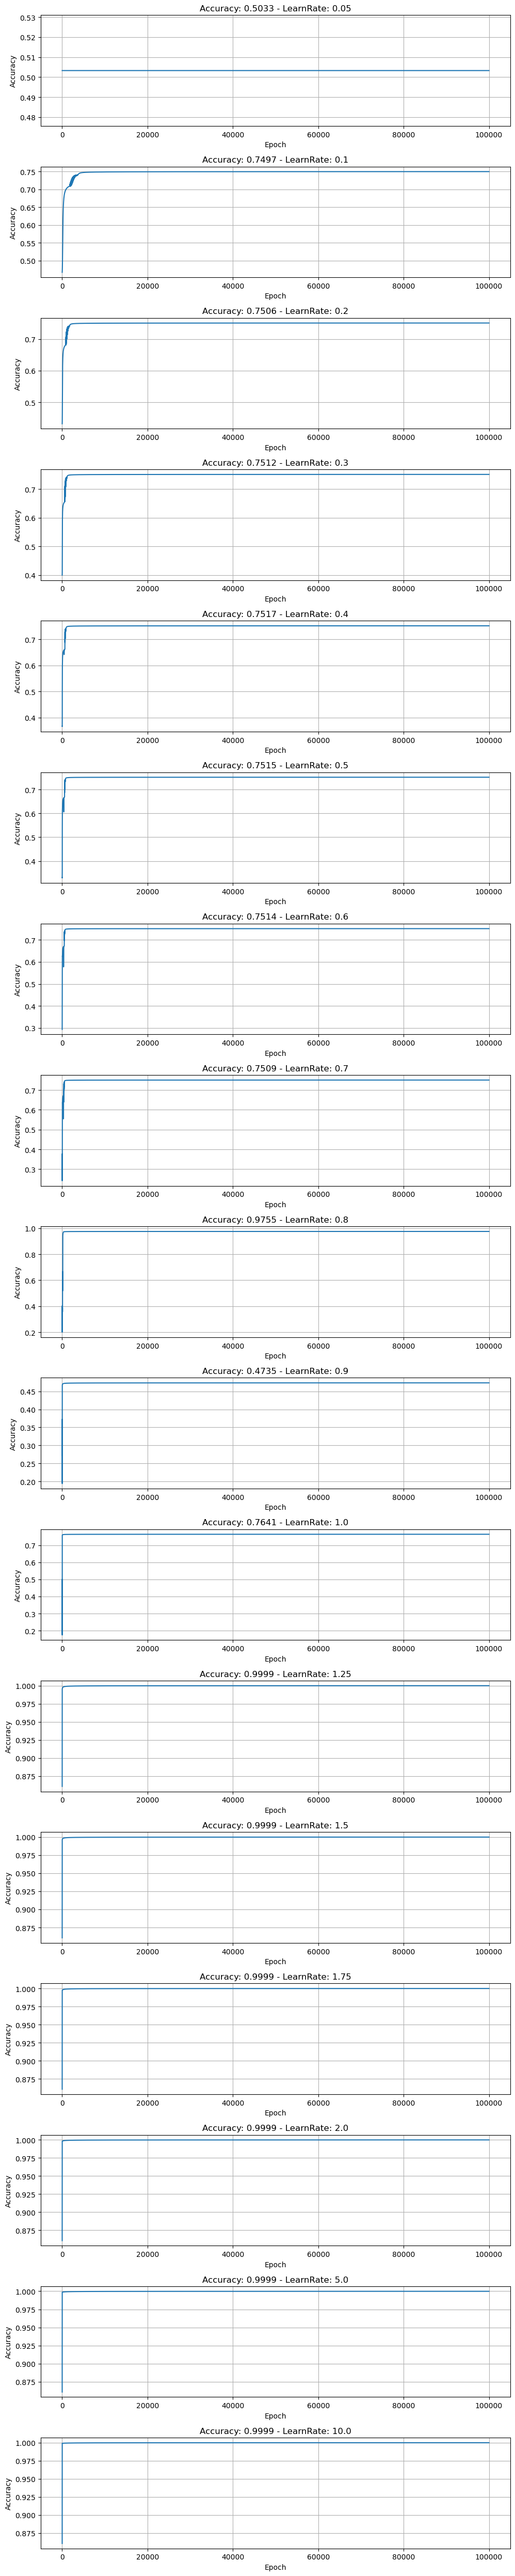

In [5]:
# Libraries
import numpy as np
import random as rand
import matplotlib.pyplot as plt

class Neuron:

  def __init__(self, ID):

    self.NeuronID = ID  

    self.Bias = 0.0
    self.Input = 0.0
    self.Output = 0.0
    self.SquareError = 0.0

class Weight:

  def __init__(self, WeightID, PtrStart, PtrEnd, WeightVal = 0.0, InputVal = 0.0):
    
    self.WeightID = WeightID
    self.WeightValue = WeightVal
    self.InputValue = InputVal

    self.PtrStart = PtrStart
    self.PtrEnd = PtrEnd

class Layer:

  def __init__(self, ID):

    self.LayerID = ID
    self.NeuronIDs = []
    self.WeightIDs = []

  def GetNeuronCount(self):
    
    return len(self.NeuronIDs)

  def GetWeightCount(self):
    
    return len(self.WeightIDs)

# Case Class
class Case:

  def __init__(self, ID, X, Y):

    self.CaseID = ID

    self.X = X
    self.Y = Y

    self.ActualOutput = 0.0
    self.Error = 0.0

# Activation Class
class Act:

  def Step(X, Derivative = False, Threshold = 0.0): 
    
    if Derivative: return 0.0
    elif X >= Threshold: return 1.0
    else: return 0.0

  def Sigmoid(X, Derivative = False): 
        
    if Derivative: return  X * (1.0 - X)
    else: return 1.0 / (1.0 + np.exp(-X))

  def Sign(X, Derivative = False): 
    
    if Derivative: return 0.0
    elif X == 0.0: return 0.0
    elif X > 0.0: return 1.0
    else: return -1.0

# Model Class
class Model:
 
    # Init Model vairables
    def __init__(self):

        # Training Data
        self.Case = []
        self.InputCount = 0
        self.OutputCount = 0

        self.CountNeuronID = -1
        self.CountWeightID = -1
        self.CountLayerID = -1

        # Neural Network Attributes
        self.EpochMax = 0
        self.LearnRate = 0.0
        self.Activate = None
        
        # Neural Network Objects
        self.Layer = [] # index 0 = input layer, index -1 = output layer
        self.Neuron = []
        self.Weight = []

        self.EpochSumError = []
        self.Accuracy = []

    # ID System #
    def CreateLayerID(self):
        
        self.CountLayerID += 1
        return self.CountLayerID
    def CreateNeuronID(self):
    
        self.CountNeuronID += 1
        return self.CountNeuronID
    def CreateWeightID(self):
        
        self.CountWeightID += 1
        return self.CountWeightID
    # End ID System #
    
    def GetWeightValue(self, PtrStart, PtrEnd):
        
        for w in self.Weight:
            if w.PtrStart == PtrStart and w.PtrEnd == PtrEnd: return w.WeightValue

        return 0.0
    
  # Training Data
    def InitDataSet(self, X, Y):
        
        # We count the number of nested lists, not the number of elements
        self.InputCount = sum(isinstance(i, list) for i in X)
        self.OutputCount = sum(isinstance(i, list) for i in Y)

        # Generate Cases from training data
        if self.InputCount == 2 and self.OutputCount == 1:

            for c in range(0, len(X[0]),1):
                self.Case.append(Case(c, [ X[0][c], X[1][c] ], Y[0][c]))

        else: assert False, "Invalid Training Data - Dataset not supported"

  # Neural Network
    def InitNeuralNet(self):
        
        # Create Layers
        for l in range(0,3,1):
        
            self.Layer.append(Layer(self.CreateLayerID()))

            # Create Input, hidden and output neurons
            for n in range(0, self.InputCount if l != 2 else self.OutputCount, 1):
                self.Neuron.append(Neuron(self.CreateNeuronID()))
                self.Layer[-1].NeuronIDs.append(self.Neuron[-1].NeuronID)

        # Generate Weights 
        for l in self.Layer[1::]:
            
            # Set random weights and biases for layer
            initWeight = rand.uniform(0.0,1.0)
            initBias = rand.uniform(-.5,.5)

            for n in l.NeuronIDs:
                
                self.Neuron[n].Bias = initBias

                for nPrior in self.Layer[l.LayerID - 1].NeuronIDs: # Connect to each neuron in the previous layer
                    
                    self.Weight.append(Weight(self.CreateWeightID(), nPrior, n, initWeight))
                    self.Layer[l.LayerID].WeightIDs.append(self.Weight[-1].WeightID)

        self.Weight[0].WeightValue = 0.5
        self.Weight[1].WeightValue = 0.4
        self.Weight[2].WeightValue = 0.9
        self.Weight[3].WeightValue = 1.0
        self.Weight[4].WeightValue = -1.2
        self.Weight[5].WeightValue = 1.1

        self.Neuron[2].Bias = 0.8
        self.Neuron[3].Bias = -0.1
        self.Neuron[4].Bias = 0.3

  # Train Model
    def TrainModel(self, Activate, LearnRate = 0.1, EpochMax = 1000):
    
        # Save neural network attributes
        self.Activate = Activate
        self.LearnRate = LearnRate
        self.EpochMax = EpochMax

        for e in range(0, EpochMax):
            
            # Train on each case
            for c in self.Case:
                
                # Feed Data to Input Layer
                for n in self.Layer[0].NeuronIDs:

                    # Set Input Neuron Output to Case Input
                    self.Neuron[n].Input = c.X[n]
                    self.Neuron[n].Output = self.Neuron[n].Input

                    # Set Weight Input Values. This propogates the output through the network
                    for w in self.Layer[1].WeightIDs:

                        if self.Weight[w].PtrStart == self.Neuron[n].NeuronID:
                            self.Weight[w].InputValue = self.Neuron[n].Output

                # Forward Propogation
                for l in self.Layer[1::]: # Skip Input Layer

                    for n in l.NeuronIDs:

                        # Calculate Input - Start From Bias and add weighted inputs
                        self.Neuron[n].Input = self.Neuron[n].Bias
                        
                        for w in l.WeightIDs:
                            
                            if self.Weight[w].PtrEnd == self.Neuron[n].NeuronID: 
                                self.Neuron[n].Input += self.Weight[w].InputValue * self.Weight[w].WeightValue
            
                        # Calculate Output
                        self.Neuron[n].Output = Activate(self.Neuron[n].Input)

                        # Update Weight Input from neuron output - This propogates to the next layer
                        if l.LayerID != self.Layer[-1].LayerID:
                            
                            for w in self.Layer[l.LayerID + 1].WeightIDs:
                                
                                if self.Weight[w].PtrStart == self.Neuron[n].NeuronID: 
                                    self.Weight[w].InputValue = self.Neuron[n].Output

                # Error Calculation. Index -1 is the output neuron
                error = c.Y - self.Neuron[-1].Output
                delta = Activate(self.Neuron[-1].Output, Derivative = True) * error

                # Update Case
                c.ActualOutput = self.Neuron[-1].Output
                c.Error = abs(error)

                # Back Propogation
                for n in reversed(self.Neuron[self.InputCount::]): # Skip Input layer, Start from Output reversed
                
                    # We check if the neuron is the output neuron. If it is, we use the delta calculated above
                    outputDeriv = Activate(n.Output, Derivative = True) * self.GetWeightValue(n.NeuronID, self.Neuron[-1].NeuronID)
                    localDelta = outputDeriv * delta if (n.NeuronID != self.Neuron[-1].NeuronID) else delta
                    
                    # Update Weights
                    for w in reversed(self.Weight):

                        if w.PtrEnd == n.NeuronID: 
                         w.WeightValue += LearnRate * w.InputValue * localDelta

                    # Update Bias
                    n.Bias += LearnRate * localDelta

                # Accumulate Squared Error
                for n in self.Neuron[self.InputCount::]:

                    # Calculate Input - Start From Bias and add weighted inputs
                    sqX = n.Bias
                
                    for w in self.Weight:

                        if w.PtrEnd == n.NeuronID: 
                            sqX += w.InputValue * w.WeightValue
                
                    # Calculate Output
                    n.SquareError = Activate(sqX)
                
                # Error Calculation. Index -1 is the output neuron
                self.EpochSumError.append((c.Y - self.Neuron[-1].SquareError) ** 2)

                # Repeat training until epoch sum error is less than 0.001
                if(self.EpochSumError[-1] < 0.001): break

            # Calculate Accuracy
            accuracy = 0.0
            for c in self.Case:
                accuracy += 1 - c.Error
            self.Accuracy.append(accuracy / len(self.Case))

    # Print Model #
    def PrintCases(self):

        print("Cases")
        for c in range(0,len(self.Case),1):
            print(
            "Case {}:".format(self.Case[c].CaseID),
            "X: {}".format(self.Case[c].X),
            "Y: {}".format(self.Case[c].Y),
            "Actual Output: {}".format(f'{self.Case[c].ActualOutput:.4g}'),
            "Accuracy: {}%".format(f'{100 * (1-self.Case[c].Error):.4g}')
            )
        print("")
    def PrintNeurons(self):

        print("Neurons")
        for n in self.NeuronIDs:
            print(
            "ID: ", n, 
            "Layer ID: ", self.Neuron[n].LayerID, 
            "Bias: ", self.Neuron[n].Bias, 
            "Input: ", self.Neuron[n].Input, 
            "Output: ", self.Neuron[n].Output
        )
        print("")
    def PrintBias(self):

        print("Bias")
        for n in self.Neuron[len(self.Layer[0].NeuronIDs)::]:
            print("ID: ", n.NeuronID, "Bias: ", n.Bias)
        print("")
    def PrintWeights(self):

        print("Weights")
        for w in self.Weight:
            print("ID: {} Ptr: [{},{}] Value: {}".format(w.WeightID, w.PtrStart, w.PtrEnd, w.WeightValue))
        print("")
    def PrintSquareError(self):

        print("Epoch Sum Error {}".format(f'{self.EpochSumError[-1]:.4g}'))
        print("Accuracy: {}%".format(f'{100 * self.Accuracy[-1]:.4g}'))
        for n in self.Neuron[len(self.Layer[0].NeuronIDs)::]:
            print("ID: ", n.NeuronID, "Square Error: {}".format(f'{n.SquareError:.4g}'))
        print("")
    
    def PrintModel(self, PrintNeurons = False, PrintBias = False, PrintWeights = False, 
                   PrintCases = False, PrintError = False):
        if PrintNeurons: self.PrintNeurons()
        if PrintWeights: self.PrintWeights()
        if PrintCases: self.PrintCases()
        if PrintBias: self.PrintBias()
        if PrintError: self.PrintSquareError()
    
    def PlotGraph(self, Title, XLabel, YLabel, Data, FigSize = (10, 6), Grid = True):
       
        plt.figure(figsize=FigSize)
        
        plt.plot(range(1, len(Data) + 1), Data)
        plt.title(Title)
        plt.xlabel(XLabel)
        plt.ylabel(YLabel)
        plt.grid(Grid)
        plt.show()
    # End Print Model #

# Dataset
A1X, A1Y = [[1.0, 0.0, 1.0, 0.0], [1.0, 1.0, 0.0, 0.0]], [[0.0, 1.0, 1.0, 0.0]]

LearnRate = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.25, 1.5, 1.75, 2.0, 5.0, 10.0]

fig, graph = plt.subplots(len(LearnRate), figsize=(10, 50))
for lr in range(0,len(LearnRate),1):
    # Initialise Model
    model = Model()

    # Set training data [[x1], [x2]], [[y1]]
    model.InitDataSet(A1X, A1Y)

    # Init Nerual Newtwork 
    model.InitNeuralNet()

    # Train model
    model.TrainModel(Activate= Act.Sigmoid, LearnRate= lr, EpochMax= 100000)

    # Plot Graph
    graph[lr].plot(range(1, len(model.Accuracy) + 1), model.Accuracy)
    graph[lr].set_title("Accuracy: {} - LearnRate: {}".format(f'{model.Accuracy[-1]:.4g}', LearnRate[lr]))
    graph[lr].set_xlabel('Epoch')
    graph[lr].set_ylabel('Accuracy')
    graph[lr].grid(True)

fig.tight_layout()
plt.show()

## Task A1.3
Analyse and evaluate the effects of activation functions by comparing Sigmoid function with the Sign function and Step function. Find out what is the best activation function for this application.